<a href="https://colab.research.google.com/github/charan542/sentimental-analysis-on-twitter/blob/main/agnipath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snscrape
!pip install clean-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 1.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 4.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=395e916f516ad494335ed448e95cfce6269b4095f02af10a9d331a8859cebad9
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
from cleantext import clean
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt. style.use('fivethirtyeight')



imorting snscape for extracting data from the twitters
importing pandas to create dataframe
imoprting regex for data cleaning
importing clean for emoji removing
importing textblob for sentimental analysis
importing word cloud



In [ ]:

query="JusticeForPreethi lang:en until:2023-02-27"
tweets=[]
limit=10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

  #print(vars(tweet))
  #break
  if len(tweets)==limit :
    break
  else:
    tweets.append(tweet.content)

<ipython-input-3-dbec91904649>:13: FutureWarning: content is deprecated, use rawContent instead
  tweets.append(tweet.content)


here we are retriveing tweets from the twitter with hashtag (#agnipath) with the range of 10,000

In [ ]:
df = pd.DataFrame( [tweet for tweet in tweets] , columns=['Tweets'])
df

,Tweets
0,The minors who raped a minor girl in moving ca...
1,Not even completed 24 hours and one more 💔 Ind...
2,Shocking... \n#justiceforpreethi \nThe first...
3,Saif it's time to reveal the truth.\nDid medic...
4,PG student Preethi passed away\nDr Preethi las...
...,...
260,"All,Whoever tried nd involved in saving accuse..."
261,14 years girl raped and murdered. They are fig...
262,https://t.co/hOYW3TIkHG\n@ysjagan @PawanKalyan...
263,#JusticeForPreethi Janasena Chief @PawanKalyan...


here we converting data into data frames

In [ ]:
for i in df.index:


  df['Tweets'][i]=re.sub("(@\w+)|(#\w+)|(https:/\S+)|(\d)|[:,”!-?/\"“\\’‘()@$%^&*<>'_|.]+|(RT[\s]+)","",str(df['Tweets'][i]))
  df['Tweets'][i]=clean(str(df['Tweets'][i]),no_emoji=True)



here we are cleaning data by regex to clean links,mentions,hashtags,digts,puncations,special characters
and by clean methood we are removing emojtes from the tweet

In [ ]:
df.drop_duplicates(inplace = True)
df.tail()

,Tweets
260,allwhoever tried nd involved in saving accused...
261,years girl raped and murdered they are fightin...
262,dear cm sir please take action on those culpri...
263,janasena chief stood for victims family amp he...
264,her parents deserve the justice


removeing duplicates

In [ ]:
df.shape


(226, 1)

shape after removeing the duplicates

In [ ]:

def getSubjectivity(text):
  return TextBlob(text).sentiment. subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df


,Tweets,Subjectivity,Polarity
0,the minors who raped a minor girl in moving ca...,0.336667,0.116667
1,not even completed hours and one more indians\...,0.300000,0.100000
2,shocking\nthe firstyear medico student of kaka...,0.466667,-0.400000
3,saif its time to reveal the truth\ndid medical...,0.000000,0.000000
4,pg student preethi passed away\ndr preethi las...,0.066667,0.000000
...,...,...,...
260,allwhoever tried nd involved in saving accused...,0.000000,0.000000
261,years girl raped and murdered they are fightin...,0.000000,0.000000
262,dear cm sir please take action on those culpri...,0.250000,0.050000
263,janasena chief stood for victims family amp he...,0.200000,0.000000


shape after removeing the duplicates

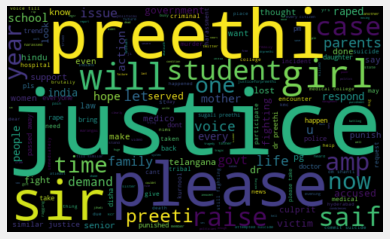

In [ ]:

allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud =WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)



plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


by this we can know that the words with resoective size they have freqency in data

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,the minors who raped a minor girl in moving ca...,0.336667,0.116667,Positive
1,not even completed hours and one more indians\...,0.300000,0.100000,Positive
2,shocking\nthe firstyear medico student of kaka...,0.466667,-0.400000,Negative
3,saif its time to reveal the truth\ndid medical...,0.000000,0.000000,Neutral
4,pg student preethi passed away\ndr preethi las...,0.066667,0.000000,Neutral
...,...,...,...,...
260,allwhoever tried nd involved in saving accused...,0.000000,0.000000,Neutral
261,years girl raped and murdered they are fightin...,0.000000,0.000000,Neutral
262,dear cm sir please take action on those culpri...,0.250000,0.050000,Positive
263,janasena chief stood for victims family amp he...,0.200000,0.000000,Neutral


classfying analyzed data into positive negative ,neutral

In [ ]:

polarity=df['Polarity'].to_numpy()
subjectivity=df['Subjectivity'].to_numpy()

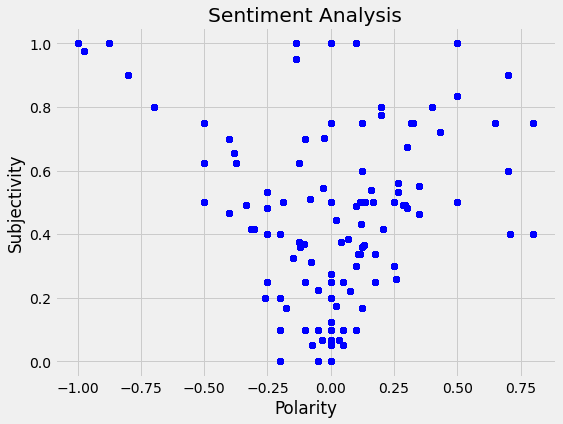

In [ ]:

plt. figure(figsize=(8,6))
for i in range(0, len(polarity)):
  plt.scatter(polarity,subjectivity, color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')

plt.ylabel( 'Subjectivity')

plt.show()


from the above graph we can say rthat more are right to zero means most people are neutral and positive

In [ ]:

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100 , 1)


29.2

calculating positive percentage

In [ ]:

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']



round( (ntweets.shape[0] / df.shape[0] *100), 1)



24.3

calculating negative percentage

In [ ]:

ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']



round( (ntweets.shape[0] / df.shape[0] *100), 1)

46.5

calculating positive percentage

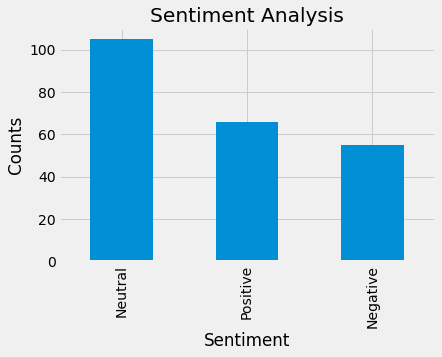

In [ ]:
df['Analysis'].value_counts()


plt.title( 'Sentiment Analysis')
plt.xlabel('Sentiment')

plt.ylabel("Counts")

df[ 'Analysis' ].value_counts() .plot(kind="bar")
plt.show()


bar graph and visualize the counts

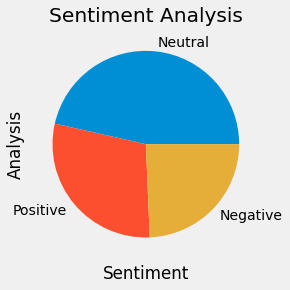

In [ ]:
df['Analysis'].value_counts()


plt.title( 'Sentiment Analysis')
plt.xlabel('Sentiment')

plt.ylabel("Counts")

df[ 'Analysis' ].value_counts() .plot(kind="pie")
plt.show()

pie chart and visualize the counts